# Quantum Circuit Learning (QCL)

Created by Muhamad Akrom m.akrom@dsn.dinus.ac.id

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from numpy import pi

from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes 
from qiskit.visualization import circuit_drawer

<div style="text-align: center; font-size: 20px;">
    <h2><span style="color:blue;">A. Variational Quantum Circuit (VQC)-based Quantum Neural Network (QNN)</span></h2>
</div>

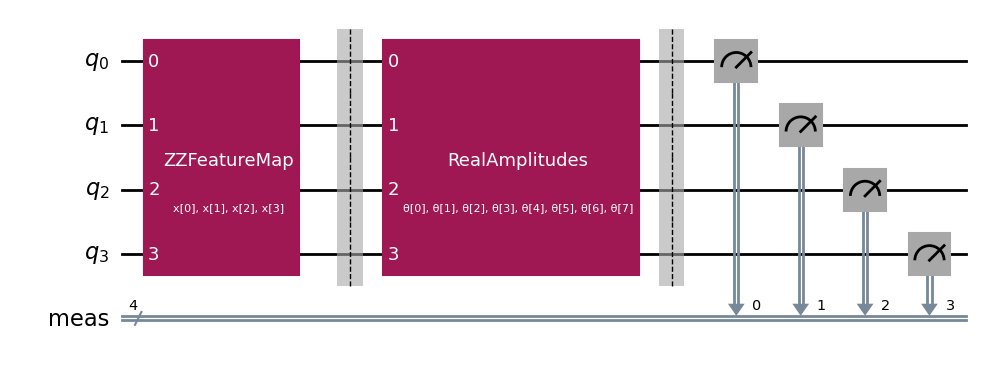

In [2]:
num_qubits = 4
qc = QuantumCircuit(num_qubits)

# Encoding
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)            # misal ZZFeatureMap
qc.append(feature_map, range(num_qubits))

qc.barrier()

# Ansatz
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)                      # misal RealAmplitudes 
qc.append(ansatz, range(num_qubits))

# Decoding
qc.measure_all()

qc.draw(output='mpl', style="iqx")

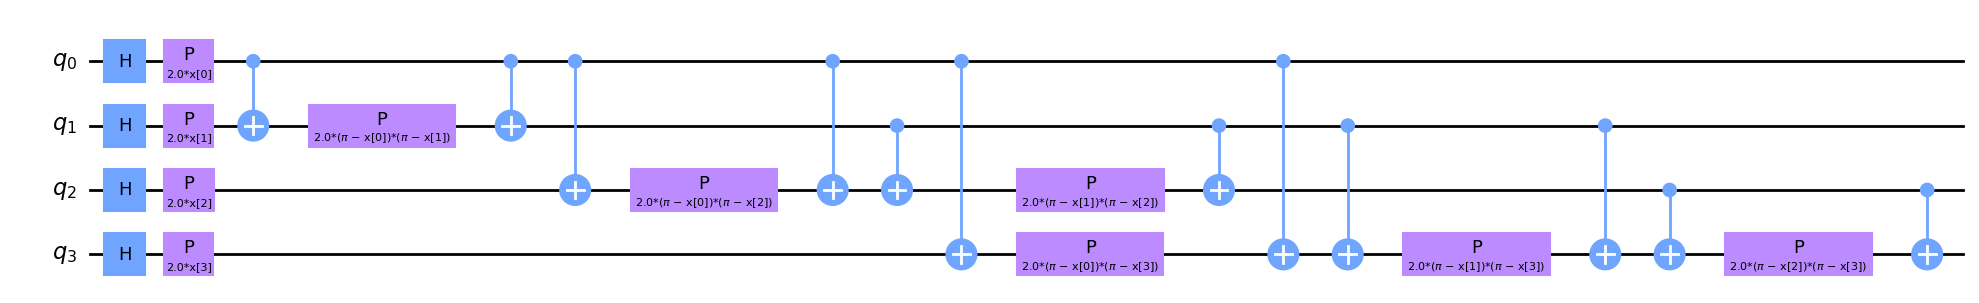

In [3]:
feature_map.decompose().draw(output="mpl", style="clifford", fold=50)

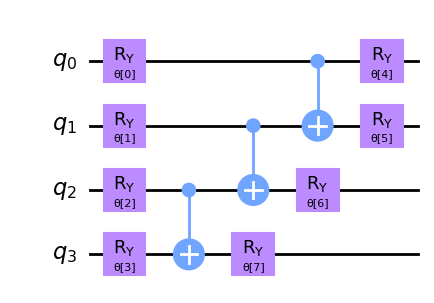

In [4]:
ansatz.decompose().draw(output="mpl", style="clifford", fold=50)

Contoh 1:
- https://www.sciencedirect.com/science/article/pii/S0306261924006275
- https://www.sciencedirect.com/science/article/pii/S0030401823007411
- others...

<div style="text-align: center; font-size: 20px;">
    <h2><span style="color:blue;">B. Adaptive Quantum Neural Network (QNN)</span></h2>
</div>

Contoh 2: Sirkuit sederhana

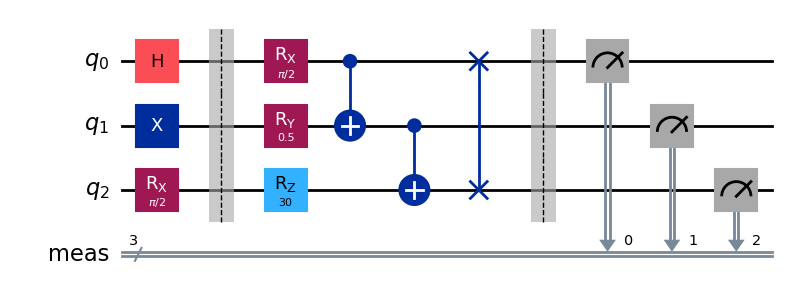

In [5]:
num_qubits = 3
qc         = QuantumCircuit(num_qubits)

# Encoding
qc.h(0)
qc.x(1)
qc.rx(np.pi/2, 2)

qc.barrier()

# Ansatz
qc.rx(np.pi/2, 0)
qc.ry(0.5, 1)
qc.rz(30, 2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.swap(0, 2)

# Decoding
qc.measure_all()

qc.draw(output='mpl', style="iqp")

Contoh 3: https://ieeexplore.ieee.org/document/9525075?denied=

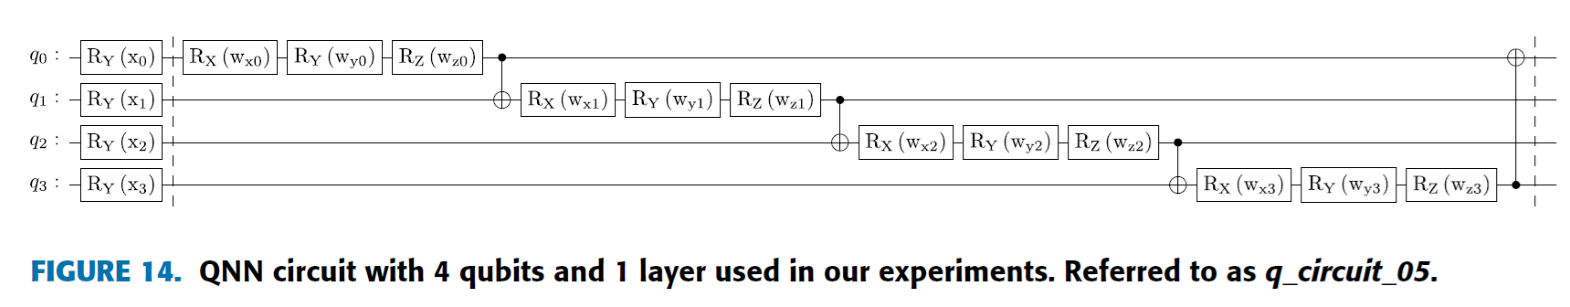

In [6]:
img = Image.open('pic1.png')
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

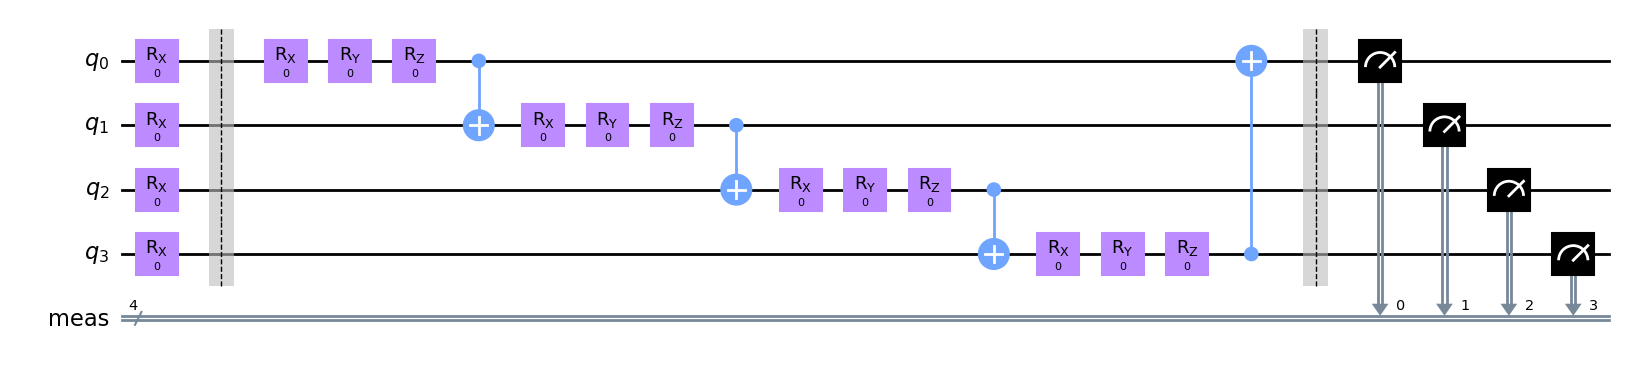

In [7]:
num_qubits = 4
qc         = QuantumCircuit(num_qubits)

# Encoding
for i in range(num_qubits):
    qc.rx(0, i)                 

qc.barrier()

# Ansatz
for j in range(num_qubits):
    qc.rx(0, j)
    qc.ry(0, j)
    qc.rz(0, j)
    if j < num_qubits - 1:
        qc.cx(j, j + 1)
qc.cx(3, 0)

# Decoding
qc.measure_all()

qc.draw(output='mpl', style="clifford")

Contoh 4: https://www.mdpi.com/2076-3417/11/14/6427

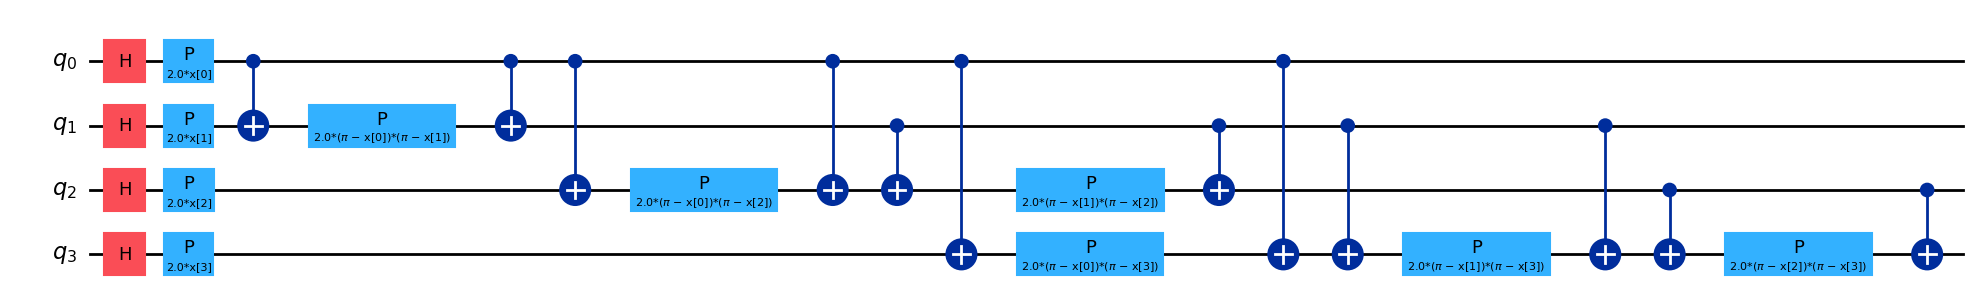

In [8]:
# Encoding

num_inputs = 2
circuit    = QuantumCircuit(num_inputs)

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)            
feature_map.decompose().draw(output="mpl", style="iqp", fold=100)

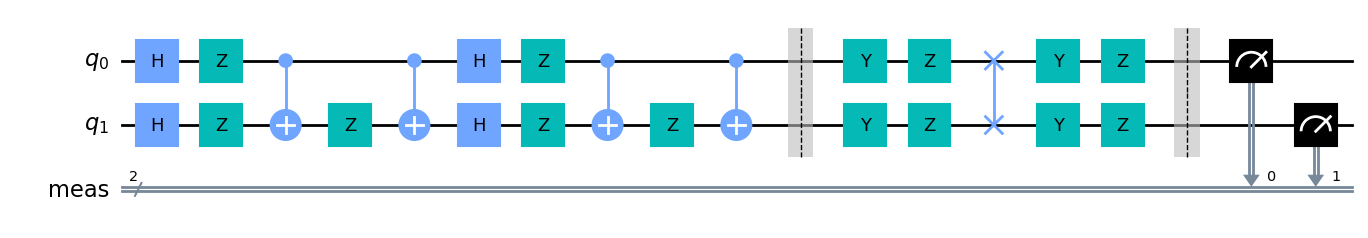

In [9]:
# Ansatz

num_inputs = 2
circuit = QuantumCircuit(num_inputs)

for i in range(num_inputs):
    circuit.h(i)
    circuit.z(i)
circuit.cx(0, 1)
circuit.z(1)
circuit.cx(0, 1)

for i in range(num_inputs):
    circuit.h(i)
    circuit.z(i)
circuit.cx(0, 1)
circuit.z(1)
circuit.cx(0, 1)

circuit.barrier()

for i in range(num_inputs):
    circuit.y(i)
    circuit.z(i)
circuit.swap(0, 1)
for i in range(num_inputs):
    circuit.y(i)
    circuit.z(i)

# Decoding
circuit.measure_all()

circuit.draw(output='mpl', style="clifford")